In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
from sklearn.manifold import TSNE
import os
import random
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras import Model, Sequential
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.layers import Input, Reshape, Dense, Dropout, \
    Activation, LeakyReLU, Conv2D, Conv2DTranspose, Embedding, \
    Concatenate, multiply, Flatten, BatchNormalization
from tensorflow.keras.initializers import glorot_normal
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.manifold import TSNE
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, imagenet_utils
from tensorflow.keras.layers import Softmax
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from sklearn.manifold import TSNE
from tensorflow.keras.models import load_model
import csv
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import load_model
from skimage.transform import resize
import natsort
import math
import glob
import pandas as pd

In [3]:


os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1')
path = os.getcwd()
filelist = glob.glob(os.path.join(path, "*.csv"))
filelist=sorted(filelist)
a = 0
phase_1 = np.zeros((96,800))

for file in filelist:
  print(file)
  result = pd.read_csv(file,header=None)
  result = result.values[:,1]
  phase_1[a,:]=result
  a=a+1



os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP2')
path = os.getcwd()
filelist = glob.glob(os.path.join(path, "*.csv"))
filelist=sorted(filelist)
a = 0
phase_2 = np.zeros((96,800))

for file in filelist:
  print(file)
  result = pd.read_csv(file,header=None)
  result = result.values[:,1]
  phase_2[a,:]=result
  a=a+1

os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP3')
path = os.getcwd()
filelist = glob.glob(os.path.join(path, "*.csv"))
filelist=sorted(filelist)
a = 0
phase_3 = np.zeros((96,800))

for file in filelist:
  print(file)
  result = pd.read_csv(file,header=None)
  result = result.values[:,1]
  phase_3[a,:]=result
  a=a+1



#phase 1:  zero: 58 & one: 38
#phase 2:  zero: 64 & one: 32
#phase 3:  zero: 59 & one: 37

#total: zero: 181 & one: 107
phase_zero=np.zeros((181,800))
phase_one=np.zeros((107,800))


j=0
for i in list(range(57))+list(range(58,59)):
  phase_zero[j,:]=phase_1[i,:]
  j=j+1
j=58
for i in list(range(60))+list(range(61,64))+list(range(65,66)):
  phase_zero[j,:]=phase_2[i,:]
  j=j+1
j=122
for i in list(range(57))+list(range(58,60)):
  phase_zero[j,:]=phase_3[i,:]
  j=j+1


j=0
for i in list(range(57,58))+list(range(59,96)):
  phase_one[j,:]=phase_1[i,:]
  j=j+1
j=38
for i in list(range(60,61))+list(range(64,65))+list(range(66,96)):
  phase_one[j,:]=phase_2[i,:]
  j=j+1
j=70
for i in list(range(57,58))+list(range(60,96)):
  phase_one[j,:]=phase_3[i,:]
  j=j+1




/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1/1 (01).csv
/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1/1 (02).csv
/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1/1 (03).csv
/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1/1 (04).csv
/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1/1 (05).csv
/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1/1 (06).csv
/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1/1 (07).csv
/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1/1 (08).csv
/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1/1 (09).csv
/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1/1 (10).csv
/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1/1 (11).csv
/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1/1 (12).csv
/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1/1 (13).csv
/content/drive/My Drive/Colab Notebooks/Johnson/phase_EXP1/1 (14).csv
/content/drive/My Dr

In [4]:


phase_xaxis = np.zeros((96,800))
result = pd.read_csv(file,header=None)
phase_xaxis[0,:] = result.values[:,0]

In [5]:
phase_xaxis[0,0:784]

array([26013.75, 26027.5 , 26041.25, 26055.  , 26068.75, 26082.5 ,
       26096.25, 26110.  , 26123.75, 26137.5 , 26151.25, 26165.  ,
       26178.75, 26192.5 , 26206.25, 26220.  , 26233.75, 26247.5 ,
       26261.25, 26275.  , 26288.75, 26302.5 , 26316.25, 26330.  ,
       26343.75, 26357.5 , 26371.25, 26385.  , 26398.75, 26412.5 ,
       26426.25, 26440.  , 26453.75, 26467.5 , 26481.25, 26495.  ,
       26508.75, 26522.5 , 26536.25, 26550.  , 26563.75, 26577.5 ,
       26591.25, 26605.  , 26618.75, 26632.5 , 26646.25, 26660.  ,
       26673.75, 26687.5 , 26701.25, 26715.  , 26728.75, 26742.5 ,
       26756.25, 26770.  , 26783.75, 26797.5 , 26811.25, 26825.  ,
       26838.75, 26852.5 , 26866.25, 26880.  , 26893.75, 26907.5 ,
       26921.25, 26935.  , 26948.75, 26962.5 , 26976.25, 26990.  ,
       27003.75, 27017.5 , 27031.25, 27045.  , 27058.75, 27072.5 ,
       27086.25, 27100.  , 27113.75, 27127.5 , 27141.25, 27155.  ,
       27168.75, 27182.5 , 27196.25, 27210.  , 27223.75, 27237

In [6]:
 list(range(800))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


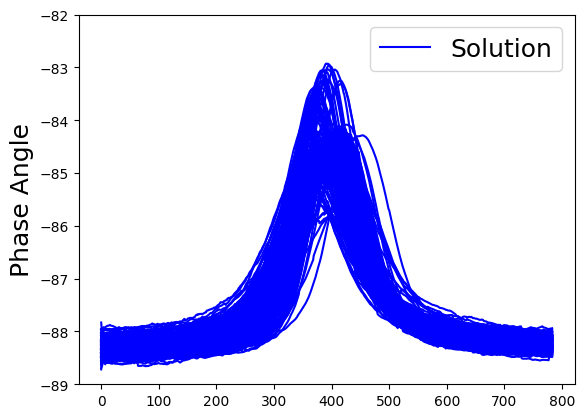

In [7]:
for i in range(181):
  plt.plot( list(range(784)),phase_zero[i,0:784],color='blue')
  plt.ylim(-89, -82)
plt.plot( list(range(784)),phase_zero[0,0:784],color='blue',label='Solution')
# plt.xlabel('Frequency (kHz)',fontsize="18")
plt.ylabel('Phase Angle',fontsize="18")
plt.legend(fontsize="18")
image_format = 'eps' # e.g .png, .svg, etc.
image_name = 'solution.eps'
os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/imbalanceGAN_scale/imbalanceGAN/code/eps')
plt.savefig(image_name, format=image_format, dpi=1200)
plt.show()

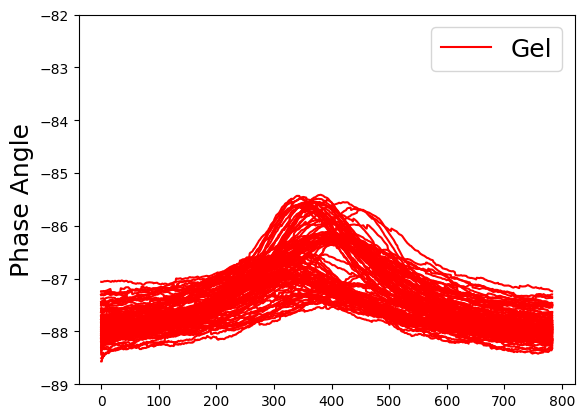

In [8]:
for i in range(107):
  plt.plot(list(range(784)),phase_one[i,0:784],color='red')
  plt.ylim(-89, -82)
plt.plot(list(range(784)),phase_one[0,0:784],color='red',label='Gel')
# plt.xlabel('Frequency kHz)',fontsize="18")
plt.ylabel('Phase Angle',fontsize="18")
plt.legend(fontsize="18")
image_format = 'eps' # e.g .png, .svg, etc.
image_name = 'gel.eps'
os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/imbalanceGAN_scale/imbalanceGAN/code/eps')
plt.savefig(image_name, format=image_format, dpi=1200)
plt.show()

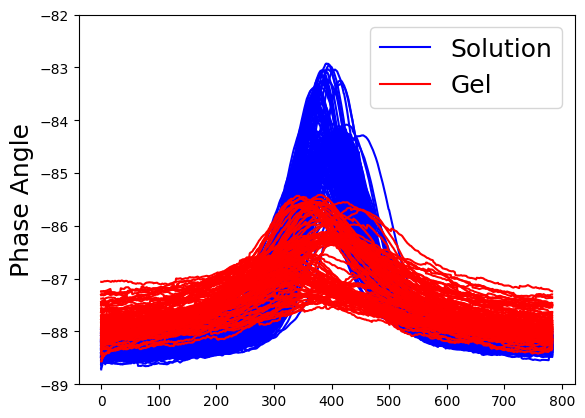

In [9]:
for i in range(181):
  plt.plot(list(range(784)),phase_zero[i,0:784],color='blue')
  plt.ylim(-89, -82)
plt.plot(list(range(784)),phase_zero[0,0:784],color='blue',label='Solution')

for i in range(107):
  plt.plot(list(range(784)),phase_one[i,0:784],color='red')
  plt.ylim(-89, -82)
plt.plot(list(range(784)),phase_one[0,0:784],color='red',label='Gel')





# plt.xlabel('Frequency (kHz)',fontsize="18")
plt.ylabel('Phase Angle',fontsize="18")
plt.legend(fontsize="18")
image_format = 'eps' # e.g .png, .svg, etc.
image_name = 'pf_together.eps'
os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/imbalanceGAN_scale/imbalanceGAN/code/eps')
plt.savefig(image_name, format=image_format, dpi=1200)
plt.show()

In [10]:
phase_xaxis[0,0:784]

array([26013.75, 26027.5 , 26041.25, 26055.  , 26068.75, 26082.5 ,
       26096.25, 26110.  , 26123.75, 26137.5 , 26151.25, 26165.  ,
       26178.75, 26192.5 , 26206.25, 26220.  , 26233.75, 26247.5 ,
       26261.25, 26275.  , 26288.75, 26302.5 , 26316.25, 26330.  ,
       26343.75, 26357.5 , 26371.25, 26385.  , 26398.75, 26412.5 ,
       26426.25, 26440.  , 26453.75, 26467.5 , 26481.25, 26495.  ,
       26508.75, 26522.5 , 26536.25, 26550.  , 26563.75, 26577.5 ,
       26591.25, 26605.  , 26618.75, 26632.5 , 26646.25, 26660.  ,
       26673.75, 26687.5 , 26701.25, 26715.  , 26728.75, 26742.5 ,
       26756.25, 26770.  , 26783.75, 26797.5 , 26811.25, 26825.  ,
       26838.75, 26852.5 , 26866.25, 26880.  , 26893.75, 26907.5 ,
       26921.25, 26935.  , 26948.75, 26962.5 , 26976.25, 26990.  ,
       27003.75, 27017.5 , 27031.25, 27045.  , 27058.75, 27072.5 ,
       27086.25, 27100.  , 27113.75, 27127.5 , 27141.25, 27155.  ,
       27168.75, 27182.5 , 27196.25, 27210.  , 27223.75, 27237

In [11]:


os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1')
path = os.getcwd()
filelist = glob.glob(os.path.join(path, "*.csv"))
filelist=sorted(filelist)
a = 0
phase_1 = np.zeros((96,800))

for file in filelist:
  print(file)
  result = pd.read_csv(file,header=0)
  result = result.values[:,2]
  phase_1[a,:]=result
  a=a+1


os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum2')
path = os.getcwd()
filelist = glob.glob(os.path.join(path, "*.csv"))
filelist=sorted(filelist)
a = 0
phase_2 = np.zeros((96,800))

for file in filelist:
  print(file)
  result = pd.read_csv(file,header=0)
  result = result.values[:,2]
  phase_2[a,:]=result
  a=a+1


os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum3')
path = os.getcwd()
filelist = glob.glob(os.path.join(path, "*.csv"))
filelist=sorted(filelist)
a = 0
phase_3 = np.zeros((96,800))

for file in filelist:
  print(file)
  result = pd.read_csv(file,header=0)
  result = result.values[:,2]
  phase_3[a,:]=result
  a=a+1


#total: zero: 194 & one: 94
phase_zero=np.zeros((194,800))
phase_one=np.zeros((94,800))

j=0
for i in range(66):
  phase_zero[j,:]=phase_1[i,:]
  j=j+1
j=66
for i in range(64):
  phase_zero[j,:]=phase_2[i,:]
  j=j+1
j=130
for i in  range(64):
  phase_zero[j,:]=phase_3[i,:]
  j=j+1

j=0
for i in range(66,96):
  phase_one[j,:]=phase_1[i,:]
  j=j+1
j=30
for i in range(64,96):
  phase_one[j,:]=phase_2[i,:]
  j=j+1
j=62
for i in range(64,96):
  phase_one[j,:]=phase_3[i,:]
  j=j+1


/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_1.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_10.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_11.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_12.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_13.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_14.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_15.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_16.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_17.csv
/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum1/well_18.csv
/

In [12]:


os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/glyco/imbalanceGAN/data/glyco_spectrum3')
path = os.getcwd()
filelist = glob.glob(os.path.join(path, "*.csv"))
filelist=sorted(filelist)
a = 0
phase_xaxis = np.zeros((96,800))

for file in filelist:
  # print(file)
  result = pd.read_csv(file,header=0)
  result = result.values[:,0]
  phase_xaxis[a,:]=result
  a=a+1


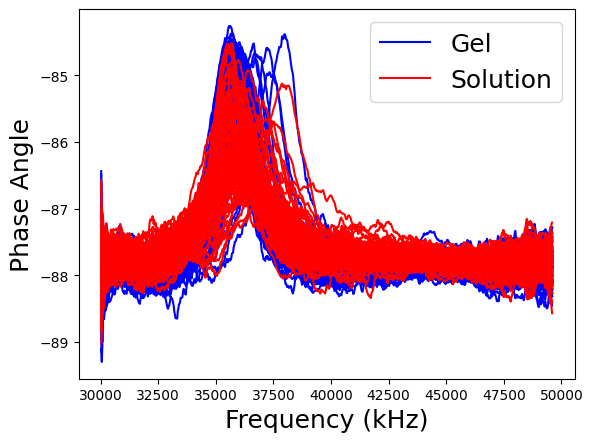

In [13]:
for i in range(194):
  plt.plot(phase_xaxis[0,0:784],phase_zero[i,0:784],color='blue')
  # plt.ylim(-90, -84)
plt.plot(phase_xaxis[0,0:784],phase_zero[0,0:784],color='blue',label='Gel')
for i in range(94):
  plt.plot(phase_xaxis[0,0:784],phase_one[i,0:784],color='red')
  # plt.ylim(-90, -84)

plt.plot(phase_xaxis[0,0:784],phase_one[0,0:784],color='red',label='Solution')

plt.xlabel('Frequency (kHz)',fontsize="18")
plt.ylabel('Phase Angle',fontsize="18")
# plt.legend((phase_zero[0,0:784],phase_one[0,0:784]),('Solution','Gel'), loc = 'best')
plt.legend(fontsize="18")
image_format = 'eps' # e.g .png, .svg, etc.
image_name = 'glyco_together.eps'
os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/imbalanceGAN_scale/imbalanceGAN/code/eps')
plt.savefig(image_name, format=image_format, dpi=1200)
plt.show()

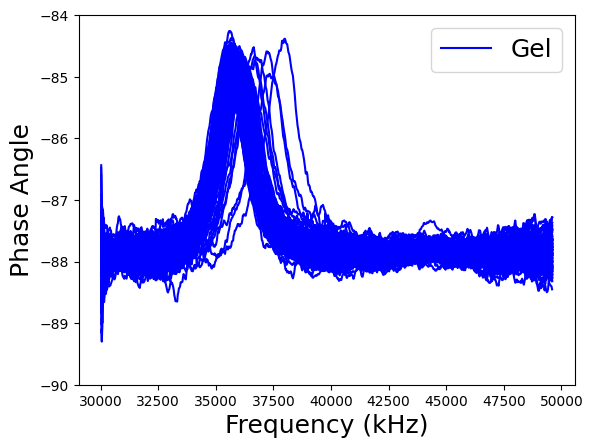

In [14]:
for i in range(194):
  plt.plot(phase_xaxis[0,0:784],phase_zero[i,0:784],color='blue')
  plt.ylim(-90, -84)
plt.plot(phase_xaxis[0,0:784],phase_zero[0,0:784],color='blue',label='Gel')
plt.xlabel('Frequency (kHz)',fontsize="18")
plt.ylabel('Phase Angle',fontsize="18")
plt.legend(fontsize="18")
image_format = 'eps' # e.g .png, .svg, etc.
image_name = 'glyco_gel.eps'
os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/imbalanceGAN_scale/imbalanceGAN/code/eps')
plt.savefig(image_name, format=image_format, dpi=1200)
plt.show()

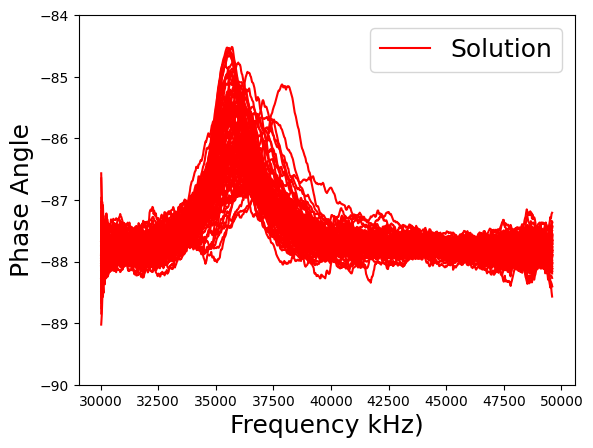

In [15]:
for i in range(94):
  plt.plot(phase_xaxis[0,0:784],phase_one[i,0:784],color='red')
  plt.ylim(-90, -84)
plt.plot(phase_xaxis[0,0:784],phase_one[0,0:784],color='red',label='Solution')
plt.xlabel('Frequency kHz)',fontsize="18")
plt.ylabel('Phase Angle',fontsize="18")
plt.legend(fontsize="18")
image_format = 'eps' # e.g .png, .svg, etc.
image_name = 'glyco_sol.eps'
os.chdir('/content/drive/My Drive/Colab Notebooks/Johnson/imbalanceGAN_scale/imbalanceGAN/code/eps')
plt.savefig(image_name, format=image_format, dpi=1200)
plt.show()